In [3]:
# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

# XGBOOST
from xgboost import XGBRFRegressor

# Seaborn
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Read data.

In [4]:
data  = pd.read_csv('medical_insurance_data.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# Exploratory Data Analysis (or EDA)

In [5]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

## Check null values

In [6]:
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

## Inference
### There are no null record present in our dataset.

## Heatmap

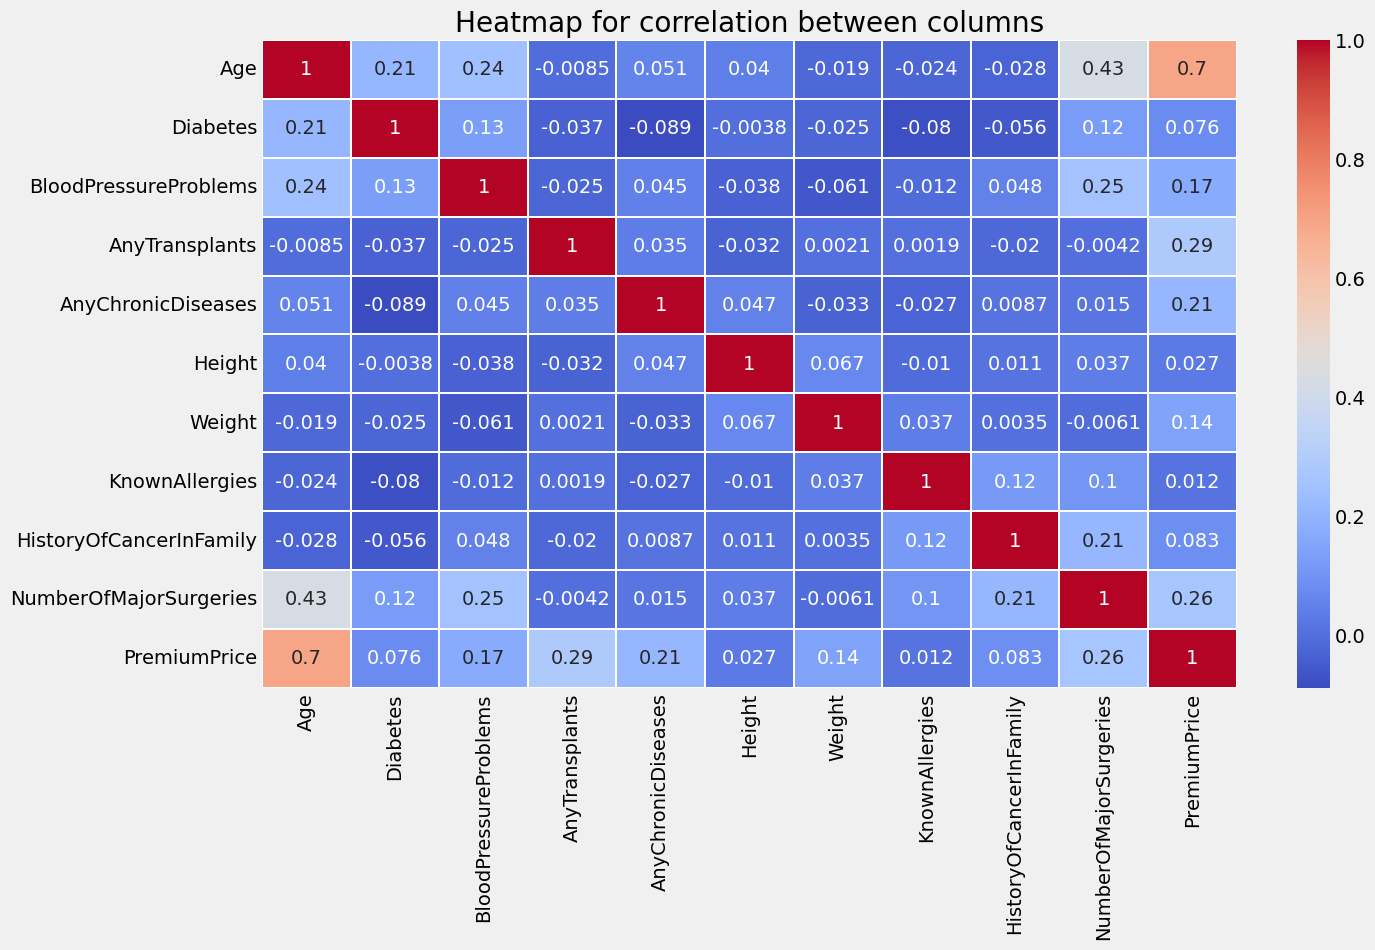

In [7]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

## Check datatypes of columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [9]:
data.Age.describe()

count    986.000000
mean      41.745436
std       13.963371
min       18.000000
25%       30.000000
50%       42.000000
75%       53.000000
max       66.000000
Name: Age, dtype: float64

# Data visualizations

Text(0.5, 1.0, 'Distribution of Age')

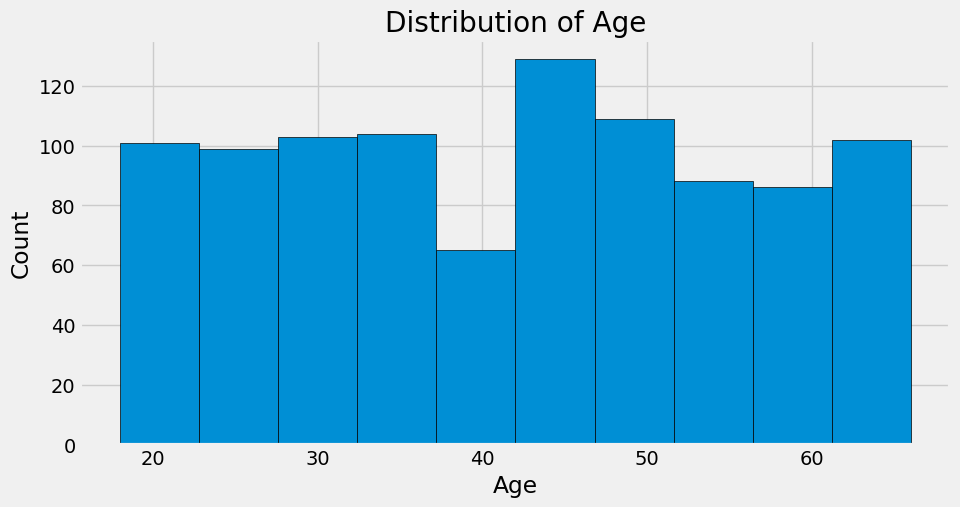

In [10]:
plt.figure(figsize=(10,5))
plt.hist(data.Age,edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")

Text(0.5, 1.0, 'Distribution of Height')

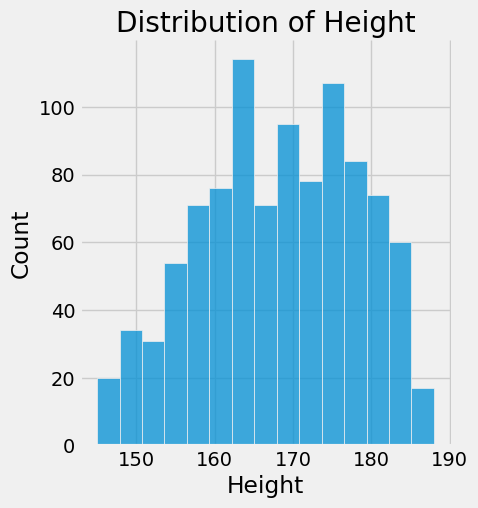

In [11]:
sns.displot(data.Height)
plt.title("Distribution of Height")

## Inference:
## The distribution of patient heights right skewed with centre of 168 with no outlier.

Text(0.5, 1.0, 'Distribution of Weight')

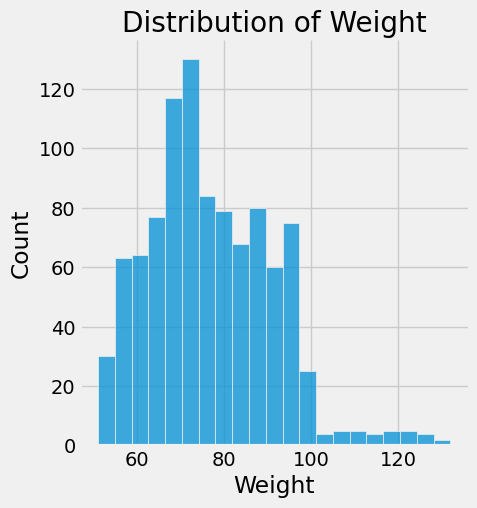

In [12]:
sns.displot(data.Weight)
plt.title("Distribution of Weight")

## Inference:
## The distribution of patient weights left skewed with centre of 75.

In [13]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

## Pairplots

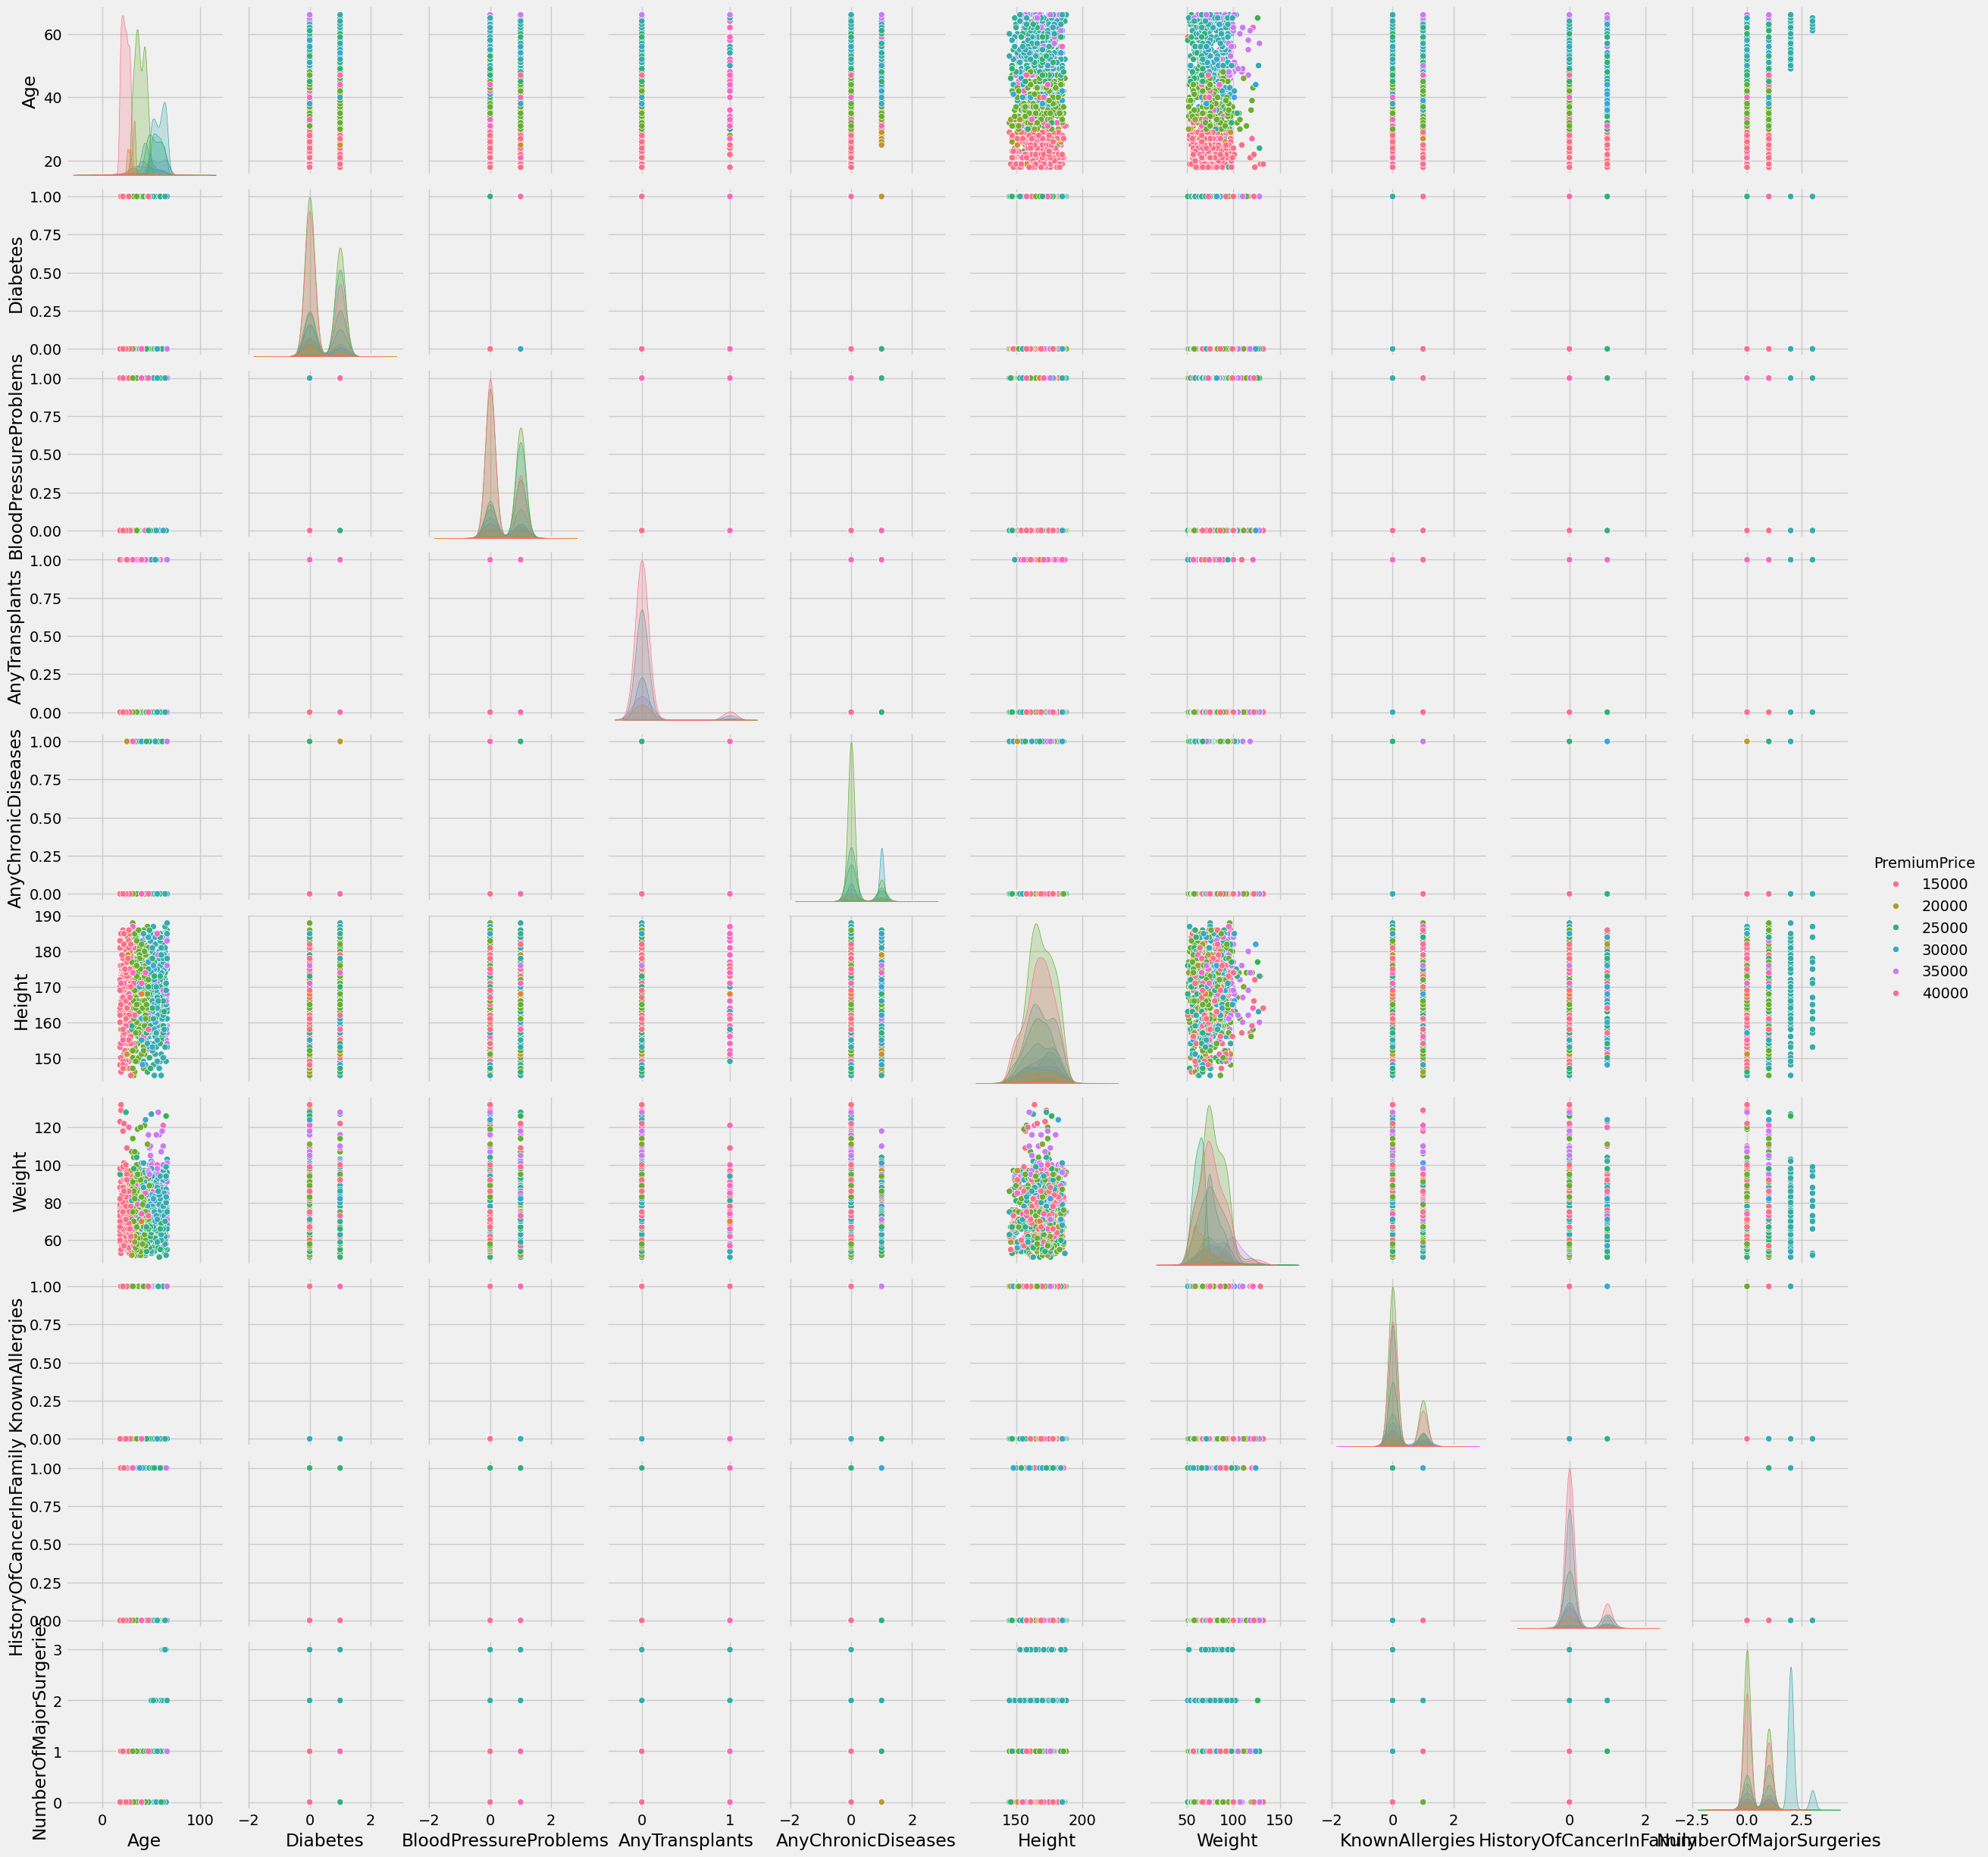

In [14]:

sns.pairplot(data,hue = 'PremiumPrice',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

## Dependent and Independent Features

In [15]:
X = data.drop('PremiumPrice',axis=1)
y = data.PremiumPrice

# Standardization

## Standardization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

In [16]:
scalar =  StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])


### 🔧 Feature Engineering  
- Created new features: `BMI`, `Age_Squared`, `Height_Squared`, `Age_BMI`, and `Age_Weight`.  
- Scaled these new features using `StandardScaler` for uniformity.  
  


In [17]:
X['BMI'] = X['Weight'] / (X['Height'] ** 2)
X['Age_Squared'] = X['Age'] ** 2
X['Height_Squared'] = X['Height'] ** 2
X['Age_BMI'] = X['Age'] * X['BMI']
X['Age_Weight'] = X['Age'] * X['Weight']
X[['BMI', 'Age_Squared', 'Height_Squared', 'Age_BMI', 'Age_Weight']] = scalar.fit_transform(
    X[['BMI', 'Age_Squared', 'Height_Squared', 'Age_BMI', 'Age_Weight']]
)
print("New features added:")
print(X.columns.tolist())
print(f"\nDataset shape: {X.shape}")

New features added:
['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI', 'Age_Squared', 'Height_Squared', 'Age_BMI', 'Age_Weight']

Dataset shape: (986, 15)


# Data collection

## To get a good prediction, divide the data into training and testing data. This is because as the name suggests you will train few data points and test few data points, and keep on doing that unless you get good results.


In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Model

### ⚙️ Model Setup  
- Defined multiple regression models: `LinearRegression`, `Lasso`, `Ridge`, `ElasticNet`, `XGBoost`, and `RandomForest`.  
- Used a range of `alphas` and `l1_ratios` for regularization tuning.  

In [19]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from numpy import logspace

alphas = logspace(-3, 3, 50)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99]

# base models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000),
    'Ridge': RidgeCV(alphas=alphas, cv=5),
    'ElasticNet': ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42, max_iter=10000),
    'XGBoost': XGBRFRegressor(random_state=42, n_estimators=100),
    'RandomForest': RandomForestRegressor(random_state=42, n_estimators=100)
}

print("Models defined:")
for name in models.keys():
    print(f"  - {name}")

Models defined:
  - Linear Regression
  - Lasso
  - Ridge
  - ElasticNet
  - XGBoost
  - RandomForest


### 🏋️ Model Training  
- Trained each defined model on the training data.  
- Stored trained models in `trained_models` for later evaluation.  
- Displayed best hyperparameters (`alpha`, `l1_ratio`) where applicable.  
- Printed training and testing R² scores to assess initial performance.  


In [20]:
trained_models = {}
for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")

    model.fit(X_train, y_train)
    trained_models[name] = model

    #  model-specific details
    if hasattr(model, 'alpha_'):
        print(f"Best Alpha: {model.alpha_}")
    if hasattr(model, 'l1_ratio_'):
        print(f"Best L1 Ratio: {model.l1_ratio_}")

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Training R²: {train_score:.4f}")
    print(f"Test R²: {test_score:.4f}")
    print("="*60)


Training: Linear Regression
Training R²: 0.6835
Test R²: 0.7212

Training: Lasso
Best Alpha: 33.9322177189533
Training R²: 0.6818
Test R²: 0.7165

Training: Ridge
Best Alpha: 2.023589647725158
Training R²: 0.6833
Test R²: 0.7198

Training: ElasticNet
Best Alpha: 0.28117686979742307
Best L1 Ratio: 0.99
Training R²: 0.6832
Test R²: 0.7197

Training: XGBoost
Training R²: 0.9136
Test R²: 0.7959

Training: RandomForest
Training R²: 0.9704
Test R²: 0.7916


### 🧠 Stacking Ensemble Model  
- Combined multiple base models (`Ridge`, `Lasso`, `ElasticNet`, `RandomForest`, `XGBoost`) into a single ensemble.  
- Used `RidgeCV` as the final estimator for meta-learning.  
- Trained the stacking model and calculated both training and testing R² scores.  
- Added the trained stacking model to the `trained_models` dictionary for comparison.  


In [21]:
base_estimators = [
    ('ridge', RidgeCV(alphas=alphas, cv=5)),
    ('lasso', LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)),
    ('elasticnet', ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42, max_iter=10000)),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=100)),
    ('xgb', XGBRFRegressor(random_state=42, n_estimators=100))
]
stacking_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=RidgeCV(alphas=alphas, cv=5),
    cv=5
)
print("Training Stacking Ensemble...")
stacking_model.fit(X_train, y_train)

stacking_train_score = stacking_model.score(X_train, y_train)
stacking_test_score = stacking_model.score(X_test, y_test)

print(f"\nStacking Ensemble Results:")
print(f"Training R²: {stacking_train_score:.4f}")
print(f"Test R²: {stacking_test_score:.4f}")

# Add to models dictionary
trained_models['Stacking'] = stacking_model

Training Stacking Ensemble...

Stacking Ensemble Results:
Training R²: 0.9456
Test R²: 0.8000


### 📊 Model Performance Visualization  
- Plotted scatter graphs comparing **actual vs predicted** premium prices for all trained models.  
- Added a red dashed line to indicate perfect prediction alignment.  
- Displayed individual model R² scores in subplot titles for quick performance insight.  



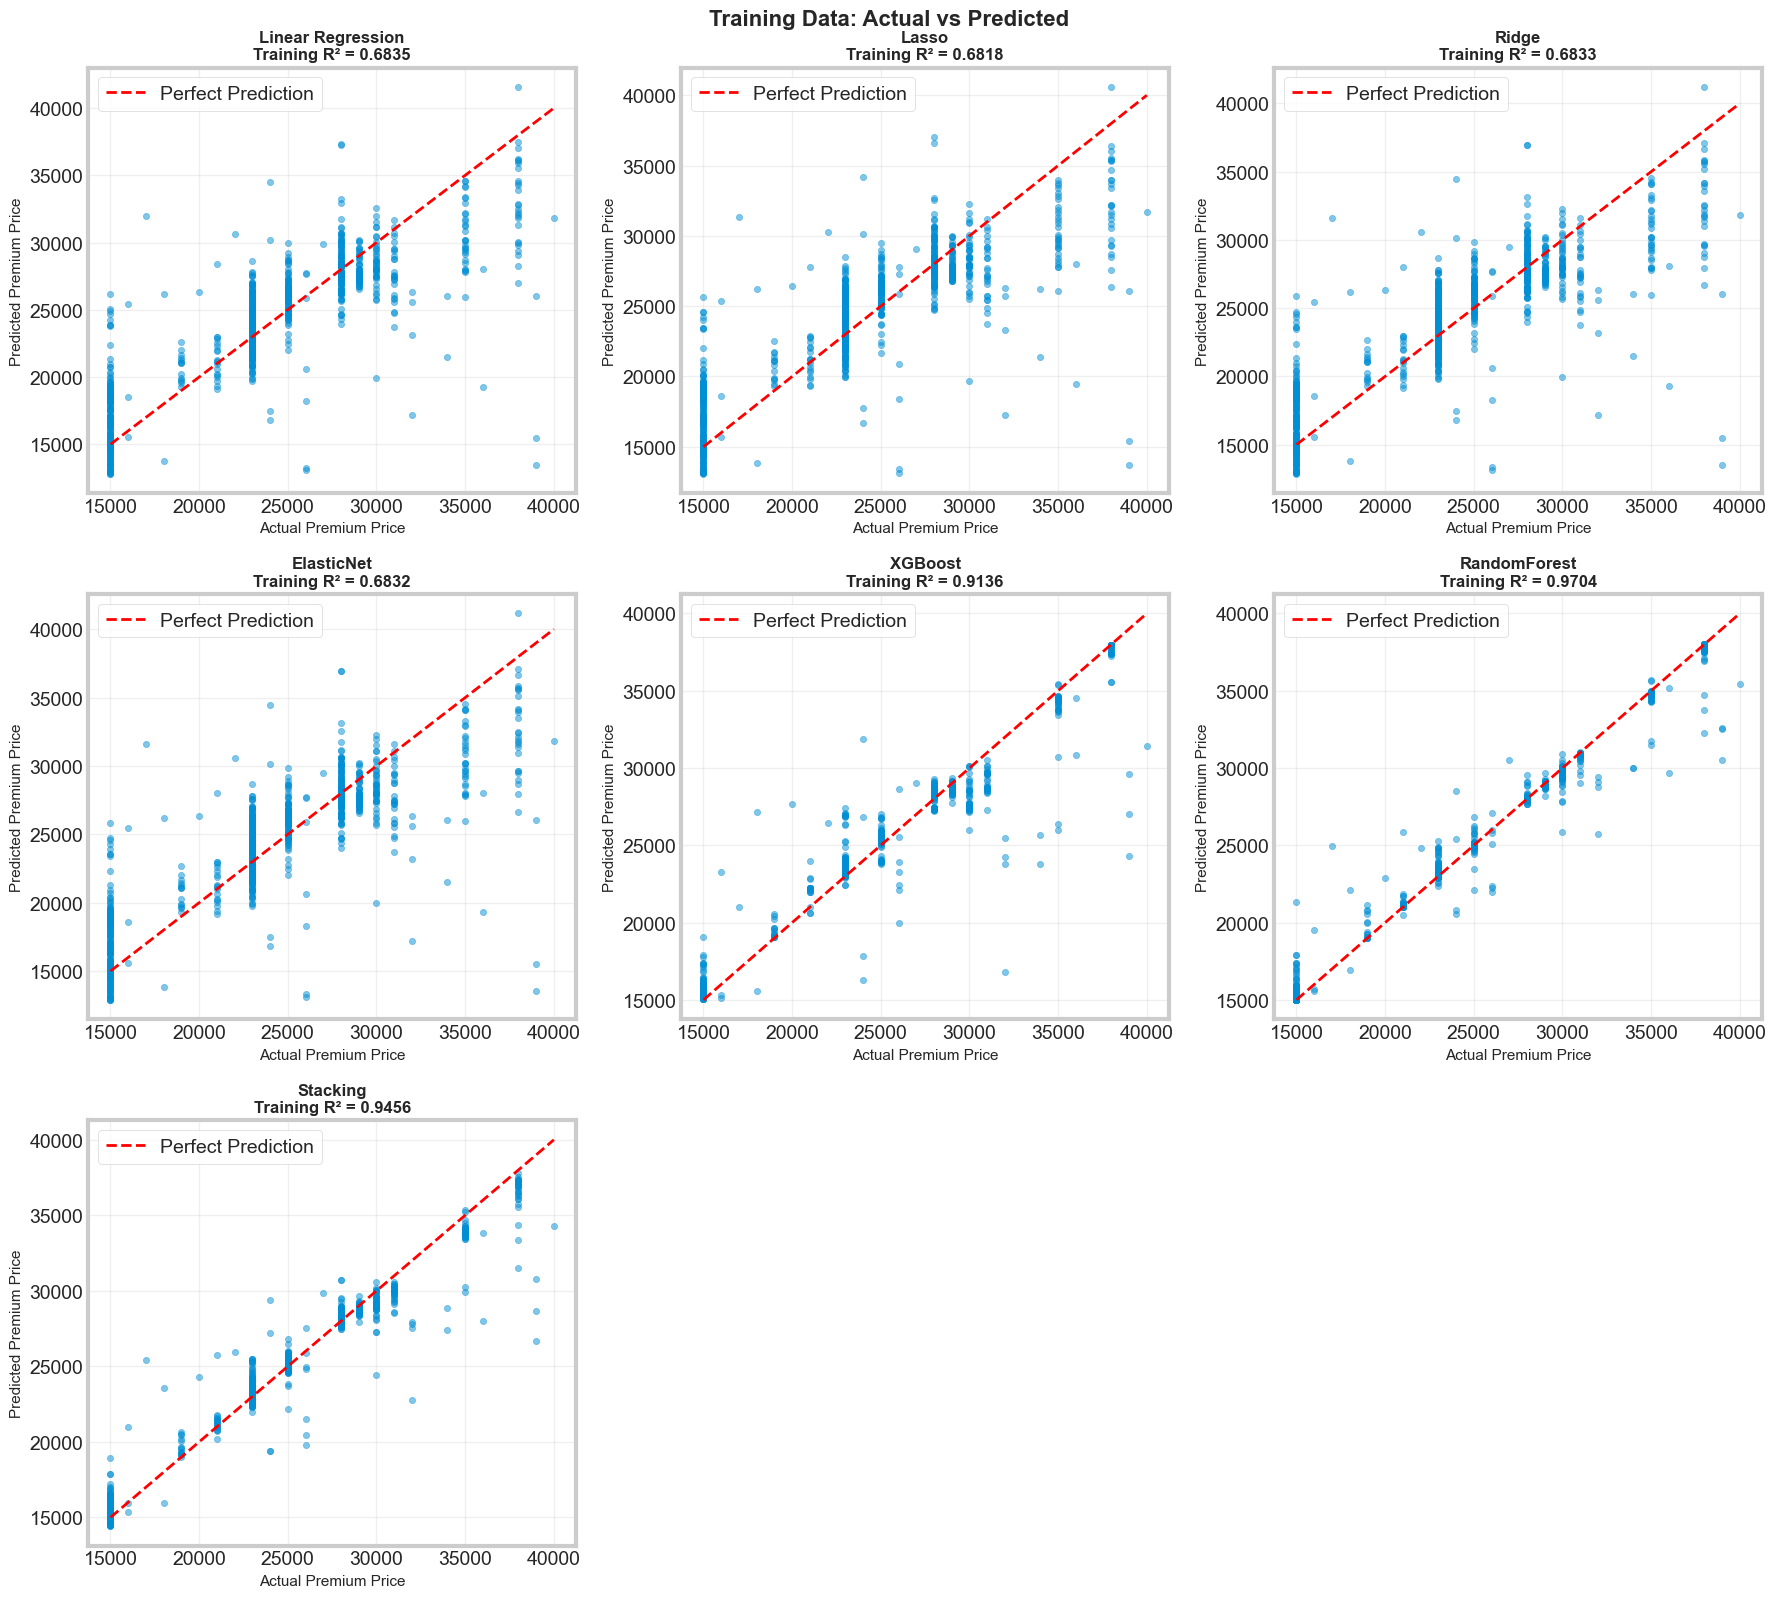

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

n_models = len(trained_models)
fig, axes = plt.subplots(3, 3, figsize=(18, 16))  # 3x3
axes = axes.flatten()

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred_train = model.predict(X_train)

    ax = axes[idx]
    ax.scatter(y_train, y_pred_train, alpha=0.5, s=20)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
            'r--', lw=2, label='Perfect Prediction')

    train_r2 = model.score(X_train, y_train)
    ax.set_xlabel('Actual Premium Price', fontsize=11)
    ax.set_ylabel('Predicted Premium Price', fontsize=11)
    ax.set_title(f'{name}\nTraining R² = {train_r2:.4f}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)


for i in range(n_models, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Training Data: Actual vs Predicted', fontsize=16, fontweight='bold', y=1.00)
plt.show()

### 📈 Test Data Evaluation  
- Visualized **actual vs predicted** values on the test set for all trained models.  
- Used green scatter points and a red dashed line for perfect prediction reference.  
- Displayed each model’s **Test R² score** in subplot titles.  



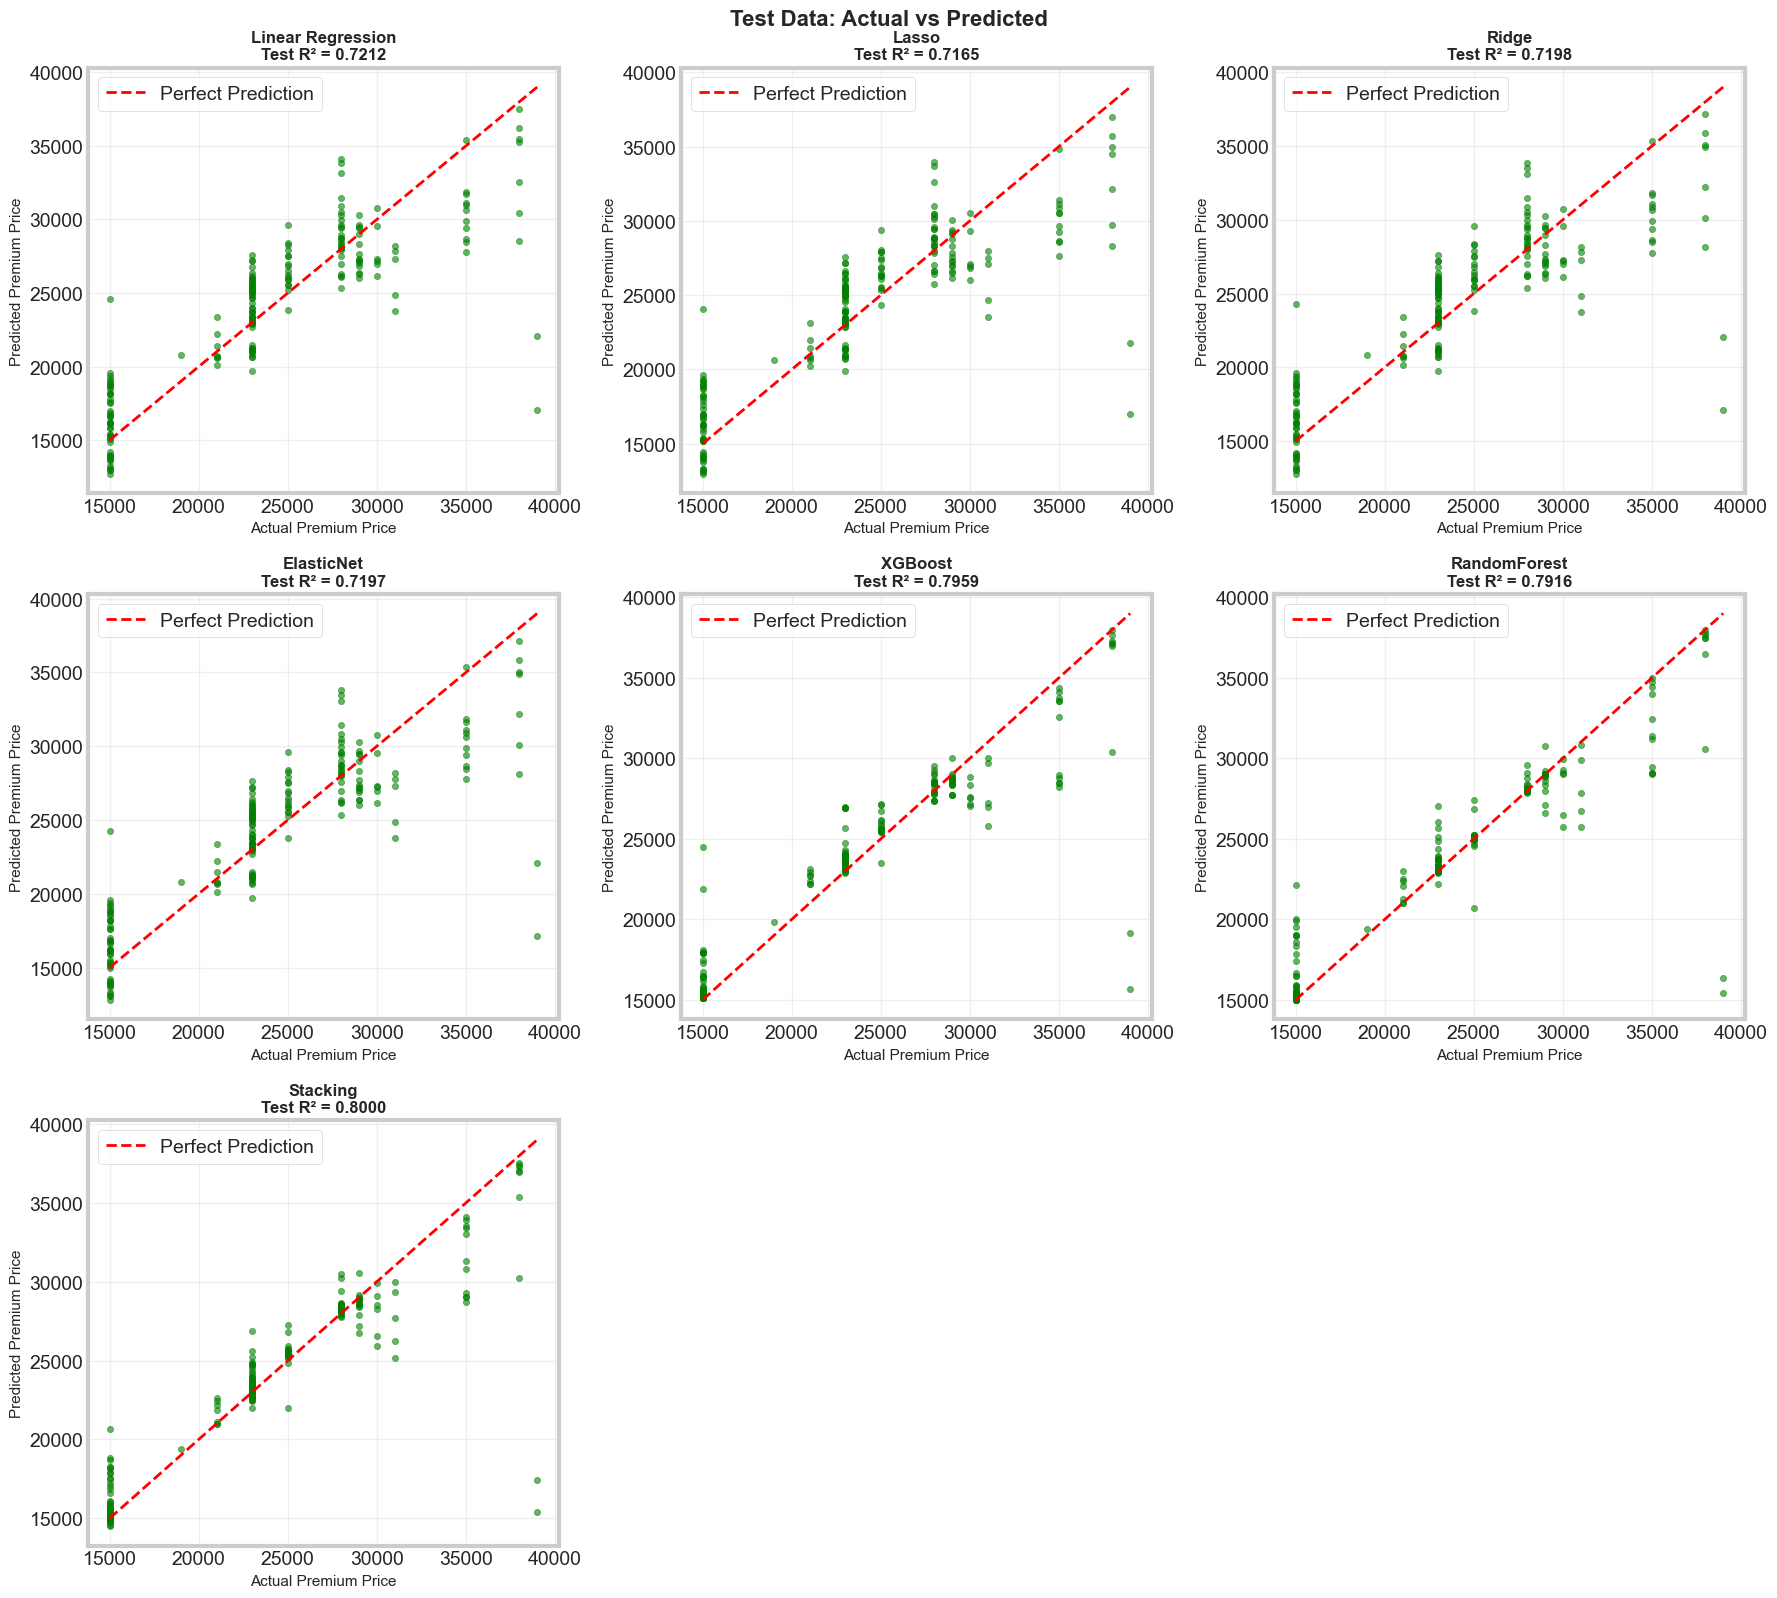

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred_test = model.predict(X_test)

    ax = axes[idx]
    ax.scatter(y_test, y_pred_test, alpha=0.6, s=20, color='green')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect Prediction')

    test_r2 = model.score(X_test, y_test)
    ax.set_xlabel('Actual Premium Price', fontsize=11)
    ax.set_ylabel('Predicted Premium Price', fontsize=11)
    ax.set_title(f'{name}\nTest R² = {test_r2:.4f}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)


for i in range(n_models, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Test Data: Actual vs Predicted', fontsize=16, fontweight='bold', y=1.00)
plt.show()

### 📊 Comprehensive Model Evaluation  
- Calculated key performance metrics for all models: **R²**, **MAE**, **RMSE**, and **Overfitting Gap**.  
- Ranked models based on their **Test R²** scores for clear comparison.  
- Visualized results using four plots:  
  - **R² Score Comparison** (Train vs Test)  
  - **Test MAE** (Lower is better)  
  - **Test RMSE** (Lower is better)  
  - **Overfitting Analysis** (Smaller gap indicates better generalization)  
- Displayed the **best-performing model** based on highest Test R² and overall balanced performance.  



MODEL COMPARISON - COMPREHENSIVE METRICS
            Model  Train_R2  Test_R2    Test_MAE   Test_RMSE  Overfit_Gap
         Stacking  0.945596 0.799980 1327.062943 2879.320919     0.145617
          XGBoost  0.913591 0.795883 1409.427612 2908.660173     0.117709
     RandomForest  0.970425 0.791617 1169.646465 2938.898045     0.178809
Linear Regression  0.683452 0.721196 2347.130261 3399.400758    -0.037744
            Ridge  0.683260 0.719825 2359.323857 3407.748912    -0.036566
       ElasticNet  0.683216 0.719670 2360.401450 3408.692066    -0.036454
            Lasso  0.681811 0.716527 2354.879819 3427.747235    -0.034716


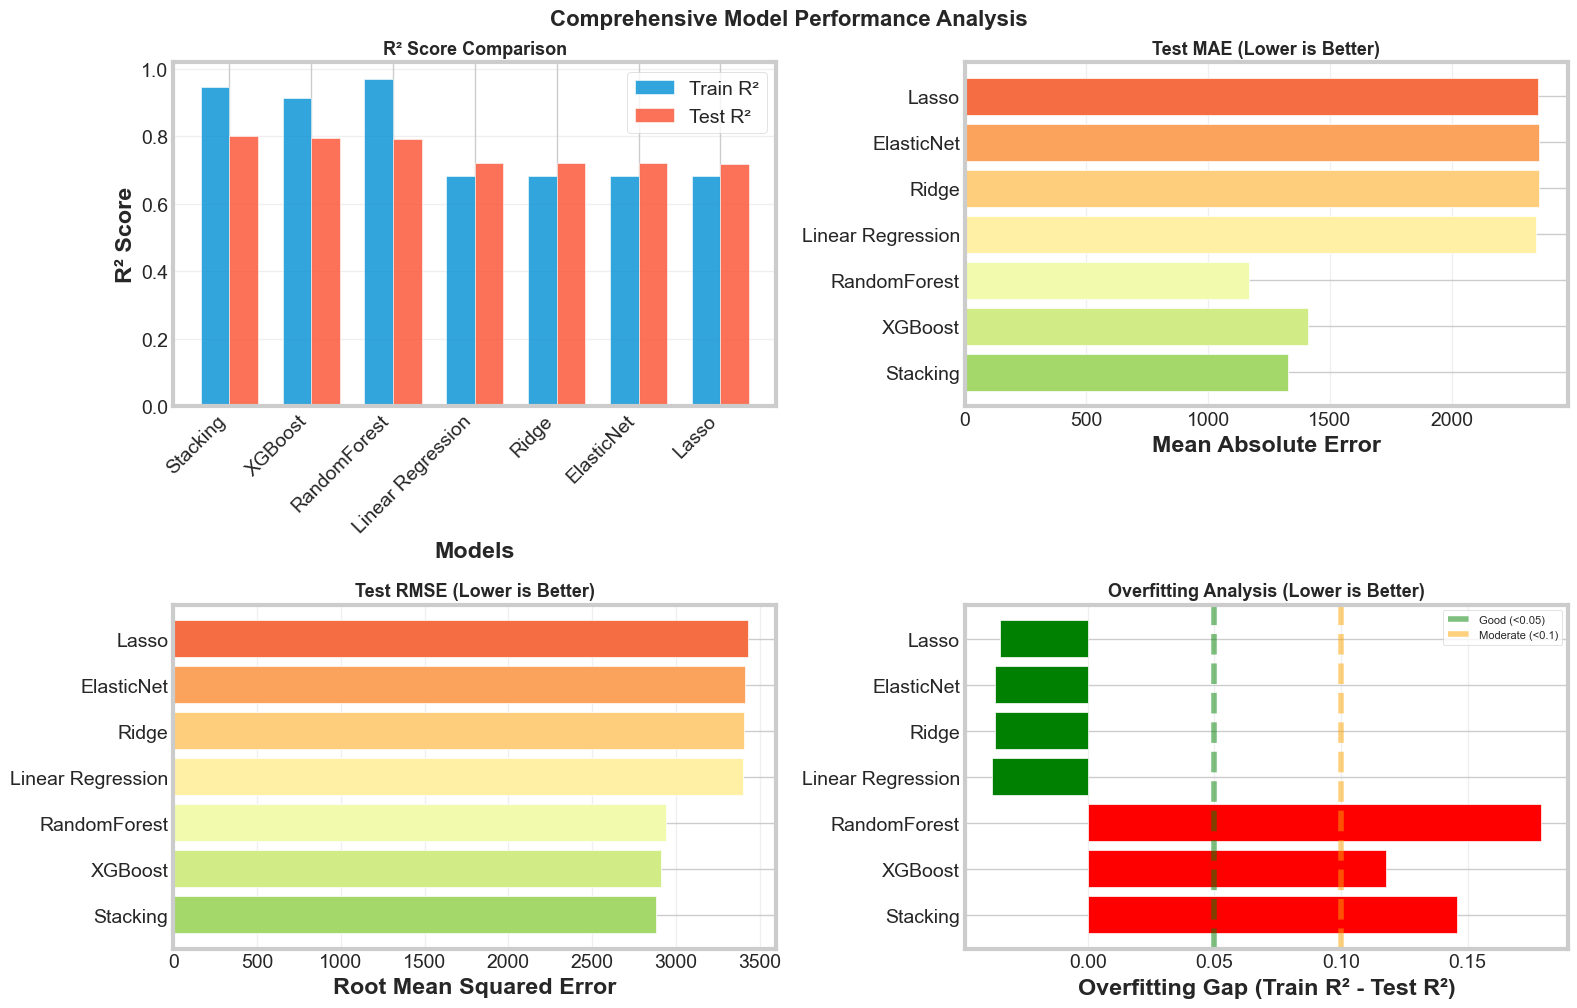


🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
BEST MODEL RECOMMENDATION
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆

Model: Stacking
Test R²: 0.8000
Test MAE: 1327.06
Test RMSE: 2879.32
Overfitting Gap: 0.1456



In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Calculate all metrics for each model
results = []

for name, model in trained_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results.append({
        'Model': name,
        'Train_R2': r2_score(y_train, y_pred_train),
        'Test_R2': r2_score(y_test, y_pred_test),
        'Test_MAE': mean_absolute_error(y_test, y_pred_test),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Overfit_Gap': r2_score(y_train, y_pred_train) - r2_score(y_test, y_pred_test)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON - COMPREHENSIVE METRICS")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

# comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: R² Scores Comparison
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
width = 0.35
ax1.bar(x_pos - width/2, results_df['Train_R2'], width, label='Train R²', alpha=0.8)
ax1.bar(x_pos + width/2, results_df['Test_R2'], width, label='Test R²', alpha=0.8)
ax1.set_xlabel('Models', fontweight='bold')
ax1.set_ylabel('R² Score', fontweight='bold')
ax1.set_title('R² Score Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Test MAE
ax2 = axes[0, 1]
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.8, len(results_df)))
ax2.barh(results_df['Model'], results_df['Test_MAE'], color=colors)
ax2.set_xlabel('Mean Absolute Error', fontweight='bold')
ax2.set_title('Test MAE (Lower is Better)', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Test RMSE
ax3 = axes[1, 0]
ax3.barh(results_df['Model'], results_df['Test_RMSE'], color=colors)
ax3.set_xlabel('Root Mean Squared Error', fontweight='bold')
ax3.set_title('Test RMSE (Lower is Better)', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Plot 4: Overfitting Analysis
ax4 = axes[1, 1]
colors_overfit = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red'
                  for x in results_df['Overfit_Gap']]
ax4.barh(results_df['Model'], results_df['Overfit_Gap'], color=colors_overfit)
ax4.set_xlabel('Overfitting Gap (Train R² - Test R²)', fontweight='bold')
ax4.set_title('Overfitting Analysis (Lower is Better)', fontsize=13, fontweight='bold')
ax4.axvline(x=0.05, color='green', linestyle='--', alpha=0.5, label='Good (<0.05)')
ax4.axvline(x=0.1, color='orange', linestyle='--', alpha=0.5, label='Moderate (<0.1)')
ax4.legend(fontsize=8)
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.suptitle('Comprehensive Model Performance Analysis', fontsize=16, fontweight='bold', y=1.01)
plt.show()

# Final Recommendation
best_model = results_df.iloc[0]
print("\n" + "🏆"*40)
print("BEST MODEL RECOMMENDATION")
print("🏆"*40)
print(f"\nModel: {best_model['Model']}")
print(f"Test R²: {best_model['Test_R2']:.4f}")
print(f"Test MAE: {best_model['Test_MAE']:.2f}")
print(f"Test RMSE: {best_model['Test_RMSE']:.2f}")
print(f"Overfitting Gap: {best_model['Overfit_Gap']:.4f}")
print("\n" + "="*80)

# Interpret

# Finding Important Features in Scikit-learn

## 1) Random Forest

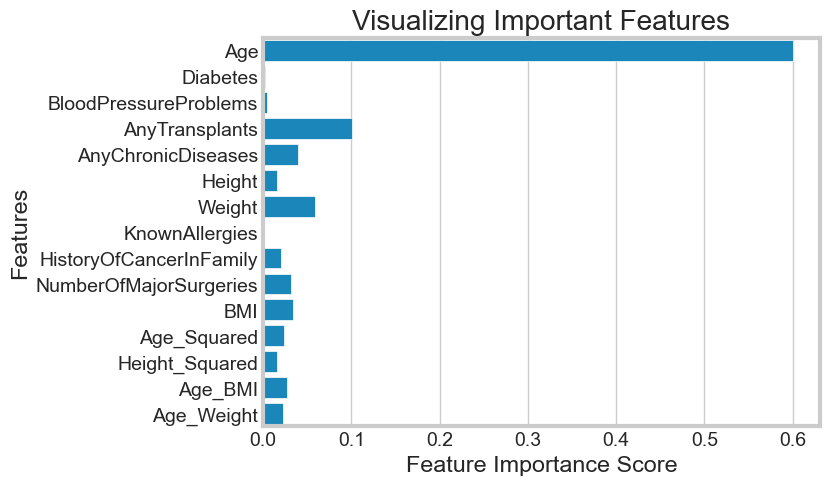

In [25]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 2) XGBoostRegressor

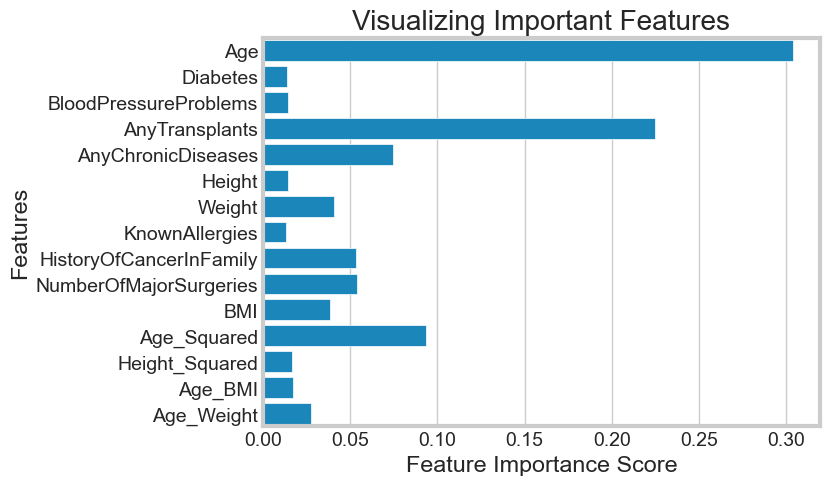

In [26]:
xgboost =XGBRFRegressor()
xgboost.fit(X_train,y_train)
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
#labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 3) ElasticNet

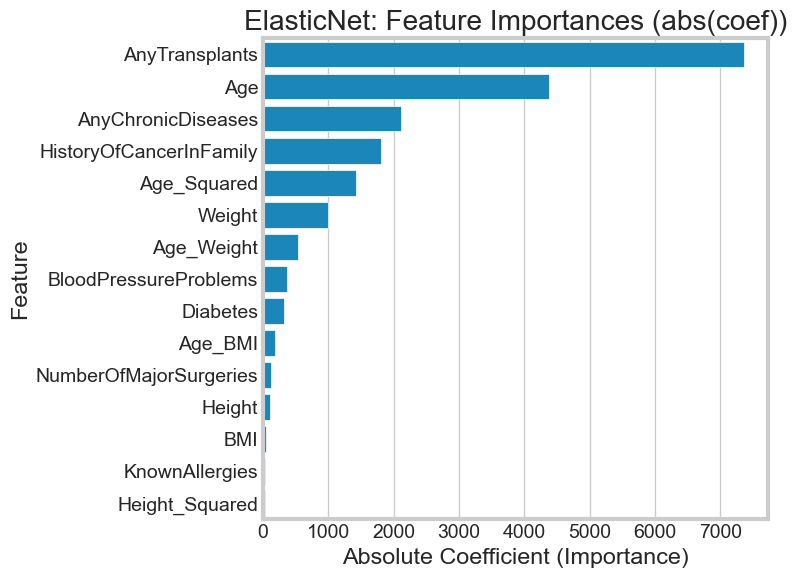


ElasticNet coefficients (sorted by abs importance):
                    feature   importance         coef
0            AnyTransplants  7362.646930  7362.646930
1                       Age  4384.481406  4384.481406
2        AnyChronicDiseases  2110.302773  2110.302773
3   HistoryOfCancerInFamily  1803.364292  1803.364292
4               Age_Squared  1416.131004 -1416.131004
5                    Weight  1000.148417  1000.148417
6                Age_Weight   534.073668   534.073668
7     BloodPressureProblems   368.126343   368.126343
8                  Diabetes   315.566085  -315.566085
9                   Age_BMI   184.678742   184.678742
10   NumberOfMajorSurgeries   121.075200  -121.075200
11                   Height   113.260110  -113.260110
12                      BMI    40.498521    40.498521
13           KnownAllergies    36.865085   -36.865085
14           Height_Squared    25.356250   -25.356250


In [27]:
# ElasticNet  cell
from sklearn.linear_model import ElasticNetCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if 'ElasticNet' in trained_models:
    en_model = trained_models['ElasticNet']
else:
    en_model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42, max_iter=10000)
    en_model.fit(X_train, y_train)

# Coefficients
coefs = en_model.coef_
features = X.columns.tolist()
imp_df = pd.DataFrame({'feature': features, 'importance': np.abs(coefs), 'coef': coefs})
imp_df = imp_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=imp_df)
plt.xlabel('Absolute Coefficient (Importance)')
plt.ylabel('Feature')
plt.title('ElasticNet: Feature Importances (abs(coef))')
plt.tight_layout()
plt.show()


print("\nElasticNet coefficients (sorted by abs importance):")
print(imp_df.reset_index(drop=True))


### ⚖️ Precompute Feature Scalers  
- Created individual `StandardScaler` objects for `Age`, `Height`, and `Weight` to match training preprocessing.  
- Computed derived features (`BMI`, `Age_Squared`, `Height_Squared`, `Age_BMI`, `Age_Weight`) using scaled base values.  
- Fitted a separate scaler for these derived features to ensure consistent scaling during predictions.  


In [28]:
# ---------- Precompute scalers  ----------
from sklearn.preprocessing import StandardScaler
import pandas as pd


base_cols = ['Age', 'Height', 'Weight']
derived_cols = ['BMI', 'Age_Squared', 'Height_Squared', 'Age_BMI', 'Age_Weight']


scaler_age = StandardScaler().fit(data[['Age']])
scaler_height = StandardScaler().fit(data[['Height']])
scaler_weight = StandardScaler().fit(data[['Weight']])


_tmp = pd.DataFrame()
_tmp['Age'] = scaler_age.transform(data[['Age']])[:, 0]
_tmp['Height'] = scaler_height.transform(data[['Height']])[:, 0]
_tmp['Weight'] = scaler_weight.transform(data[['Weight']])[:, 0]


_tmp['BMI'] = _tmp['Weight'] / (_tmp['Height'] ** 2)
_tmp['Age_Squared'] = _tmp['Age'] ** 2
_tmp['Height_Squared'] = _tmp['Height'] ** 2
_tmp['Age_BMI'] = _tmp['Age'] * _tmp['BMI']
_tmp['Age_Weight'] = _tmp['Age'] * _tmp['Weight']


scaler_derived = StandardScaler().fit(_tmp[derived_cols])


### 🖥️ Interactive Premium Prediction UI  
- Designed a clean, interactive interface using **ipywidgets** and **custom CSS styling**.  
- Added sliders for continuous inputs (`Age`, `Height`, `Weight`, `Surgeries`) and toggle buttons for medical conditions.  
- Implemented modal-style layout with sections for **Personal Information** and **Medical History**.  
- Integrated a **prediction function** that:  
  - Preprocesses user inputs using pre-fitted scalers.  
  - Selects the best-trained model dynamically.  
  - Displays the predicted insurance premium in a styled result box.  
- Included **Reset** and **Close** options for smooth user interaction.  


In [29]:
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import numpy as np

# Custom CSS
style = """
<style>
.modal-overlay {
    background: rgba(0, 0, 0, 0.5);
    padding: 20px;
    border-radius: 10px;
}
.modal-content {
    background: #1e1e1e;
    padding: 30px;
    border-radius: 15px;
    box-shadow: 0 10px 40px rgba(0,0,0,0.6);
}
.section-header {
    color: #4fc3f7;
    font-size: 16px;
    font-weight: bold;
    margin: 20px 0 10px 0;
    padding-bottom: 5px;
    border-bottom: 2px solid #00bcd4;
}
.result-box {
    background: linear-gradient(135deg, #00bcd4 0%, #0097a7 100%);
    color: #ffffff;
    padding: 20px;
    border-radius: 10px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    margin-top: 20px;
    box-shadow: 0 5px 15px rgba(0,188,212,0.4);
}
</style>
"""

display(HTML(style))

# Create main container
main_container = widgets.VBox()
modal_container = widgets.VBox()

# Open button
open_button = widgets.Button(
    description='🏥 Open Premium Calculator',
    button_style='info',
    layout=widgets.Layout(width='300px', height='50px'),
    style={'font_weight': 'bold', 'font_size': '16px'}
)

# Input widgets with improved styling
age_widget = widgets.IntSlider(
    min=int(data['Age'].min()),
    max=int(data['Age'].max()),
    description='Age:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='100%')
)

height_widget = widgets.FloatSlider(
    min=float(data['Height'].min()),
    max=float(data['Height'].max()),
    description='Height (cm):',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='100%')
)

weight_widget = widgets.FloatSlider(
    min=float(data['Weight'].min()),
    max=float(data['Weight'].max()),
    description='Weight (kg):',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='100%')
)

surgeries_widget = widgets.IntSlider(
    min=int(data['NumberOfMajorSurgeries'].min()),
    max=int(data['NumberOfMajorSurgeries'].max()),
    description='Major Surgeries:',
    style={'description_width': '150px'},
    layout=widgets.Layout(width='100%')
)

# Toggle buttons for binary choices
diabetes_widget = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Diabetes:',
    button_style='',
    style={'description_width': '150px'}
)

bloodpressure_widget = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Blood Pressure:',
    button_style='',
    style={'description_width': '150px'}
)

transplants_widget = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Transplants:',
    button_style='',
    style={'description_width': '150px'}
)

chronic_diseases_widget = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Chronic Diseases:',
    button_style='',
    style={'description_width': '150px'}
)

allergies_widget = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Allergies:',
    button_style='',
    style={'description_width': '150px'}
)

cancer_history_widget = widgets.ToggleButtons(
    options=[('No', 0), ('Yes', 1)],
    description='Cancer History:',
    button_style='',
    style={'description_width': '150px'}
)

# Section headers
personal_info_header = widgets.HTML('<div class="section-header">📋 Personal Information</div>')
medical_history_header = widgets.HTML('<div class="section-header">⚕️ Medical History</div>')

# Output widget
output_widget = widgets.Output()

# Buttons
predict_button = widgets.Button(
    description='🔮 Predict Premium',
    button_style='success',
    layout=widgets.Layout(width='200px', height='45px'),
    style={'font_weight': 'bold'}
)

close_button = widgets.Button(
    description='✖ Close',
    button_style='danger',
    layout=widgets.Layout(width='150px', height='45px')
)

reset_button = widgets.Button(
    description='🔄 Reset',
    button_style='warning',
    layout=widgets.Layout(width='150px', height='45px')
)

# Organize widgets in sections
personal_info_section = widgets.VBox([
    personal_info_header,
    age_widget,
    height_widget,
    weight_widget
], layout=widgets.Layout(padding='10px'))

medical_history_section = widgets.VBox([
    medical_history_header,
    diabetes_widget,
    bloodpressure_widget,
    transplants_widget,
    chronic_diseases_widget,
    allergies_widget,
    cancer_history_widget,
    surgeries_widget
], layout=widgets.Layout(padding='10px'))

# Button row
button_row = widgets.HBox(
    [predict_button, reset_button, close_button],
    layout=widgets.Layout(justify_content='center', padding='20px')
)

# Modal content
modal_content = widgets.VBox([
    widgets.HTML('<h2 style="text-align:center; color:#4fc3f7;">💰 Insurance Premium Calculator</h2>'),
    personal_info_section,
    medical_history_section,
    button_row,
    output_widget
], layout=widgets.Layout(
    width='700px',
    border='3px solid #00bcd4',
    padding='20px',
    border_radius='15px',
    background_color='#2d2d2d'
))

# Prediction function
# === UPDATED predict_premium FUNCTION (no CSS or layout changes) ===
def predict_premium(b):
    with output_widget:
        output_widget.clear_output()

        # 1) Collect raw user input
        raw = pd.DataFrame({
            'Age': [float(age_widget.value)],
            'Diabetes': [int(diabetes_widget.value)],
            'BloodPressureProblems': [int(bloodpressure_widget.value)],
            'AnyTransplants': [int(transplants_widget.value)],
            'AnyChronicDiseases': [int(chronic_diseases_widget.value)],
            'Height': [float(height_widget.value)],
            'Weight': [float(weight_widget.value)],
            'KnownAllergies': [int(allergies_widget.value)],
            'HistoryOfCancerInFamily': [int(cancer_history_widget.value)],
            'NumberOfMajorSurgeries': [int(surgeries_widget.value)]
        })

        # 2) Scale base numeric features using pre-fit scalers
        raw_scaled = raw.copy()
        raw_scaled['Age'] = scaler_age.transform(raw_scaled[['Age']])
        raw_scaled['Height'] = scaler_height.transform(raw_scaled[['Height']])
        raw_scaled['Weight'] = scaler_weight.transform(raw_scaled[['Weight']])

        # 3) Create derived features (using scaled height/weight as in training)
        raw_scaled['BMI'] = raw_scaled['Weight'] / (raw_scaled['Height'] ** 2)
        raw_scaled['Age_Squared'] = raw_scaled['Age'] ** 2
        raw_scaled['Height_Squared'] = raw_scaled['Height'] ** 2
        raw_scaled['Age_BMI'] = raw_scaled['Age'] * raw_scaled['BMI']
        raw_scaled['Age_Weight'] = raw_scaled['Age'] * raw_scaled['Weight']

        # 4) Scale derived-features block with pre-fit scaler_derived
        raw_scaled[derived_cols] = scaler_derived.transform(raw_scaled[derived_cols])

        # 5) Reorder to match training features (fill any missing features with 0)
        try:
            final_cols = list(X.columns)  # the features used during training
        except Exception:
            final_cols = raw_scaled.columns.tolist() + [c for c in derived_cols if c not in raw_scaled.columns]
        input_row = pd.DataFrame(columns=final_cols, index=[0])
        for c in final_cols:
            if c in raw_scaled.columns:
                input_row.at[0, c] = raw_scaled.at[0, c]
            else:
                # binary or missing features default to 0
                input_row.at[0, c] = 0.0
        input_row = input_row.astype(float)

        # 6) Choose best model from results_df if available, else fallback
        try:
            best_model_name = results_df.iloc[0]['Model']
            model = trained_models.get(best_model_name, None)
            if model is None:
                raise KeyError
        except Exception:
            # fallback order: ElasticNet -> RandomForest -> any available model
            model = trained_models.get('ElasticNet') or trained_models.get('RandomForest') \
                    or next(iter(trained_models.values()), None)
            best_model_name = getattr(model, '__class__', type(model)).__name__

        # 7) Predict safely
        try:
            predicted_price = float(model.predict(input_row)[0])
        except Exception as e:
            # final fallback to random_forest if available
            try:
                predicted_price = float(random_forest.predict(input_row)[0])
                best_model_name = 'RandomForest (fallback)'
            except Exception as e2:
                display(HTML(f"<div style='color:salmon'>Prediction failed: {e}<br>Fallback also failed: {e2}</div>"))
                return

        # 8) Show result using your same styled result-box (no CSS change)
        display(HTML(f'''
            <div class="result-box">
                💵 Predicted Premium Price<br>
                <span style="font-size: 32px;">₹{predicted_price:,.2f}</span><br>
                <small style="display:block; margin-top:8px; color:#083344;">Model used: <strong>{best_model_name}</strong></small>
            </div>
        '''))



# Reset function
def reset_inputs(b):
    age_widget.value = int(data['Age'].median())
    height_widget.value = float(data['Height'].median())
    weight_widget.value = float(data['Weight'].median())
    surgeries_widget.value = 0
    diabetes_widget.value = 0
    bloodpressure_widget.value = 0
    transplants_widget.value = 0
    chronic_diseases_widget.value = 0
    allergies_widget.value = 0
    cancer_history_widget.value = 0
    output_widget.clear_output()

# Open/close modal functions
def open_modal(b):
    main_container.children = [modal_content]

def close_modal(b):
    main_container.children = [open_button]
    output_widget.clear_output()

# Link buttons to functions
open_button.on_click(open_modal)
close_button.on_click(close_modal)
predict_button.on_click(predict_premium)
reset_button.on_click(reset_inputs)

# Initial display
main_container.children = [open_button]
display(main_container)